In [33]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import entropy
from scipy.optimize import curve_fit
import datetime
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [20]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\SSNC7_20230601')
file_list = glob.glob("./*.csv", recursive=True)

In [3]:
df = pd.read_csv(file_list[0], sep=',',header=0)
df

,Unnamed: 0,Time,External Sound,Ambient Temp.,Target Temp.
0,1,2023-06-01 16:04:00,492,31.89,31.49
1,2,2023-06-01 16:04:00,437,31.89,31.49
2,3,2023-06-01 16:04:00,560,31.89,31.49
3,4,2023-06-01 16:04:00,469,31.89,31.49
4,5,2023-06-01 16:04:00,402,31.89,31.49
...,...,...,...,...,...
604,612,2023-06-01 16:04:00,576,31.91,31.43
605,613,2023-06-01 16:04:00,518,31.91,31.43
606,614,2023-06-01 16:04:00,371,31.91,31.43
607,615,2023-06-01 16:04:00,604,31.91,31.43


In [4]:
drop_columns=['Unnamed: 0', 'Time','Ambient Temp.', 'Target Temp.']
df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
df

,External Sound
0,492
1,437
2,560
3,469
4,402
...,...
604,576
605,518
606,371
607,604


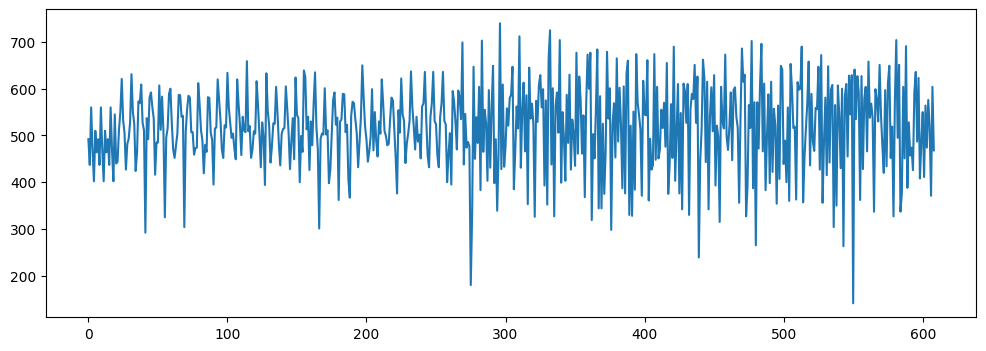

In [5]:
plt.figure(figsize=(12,4))
plt.plot(df['External Sound'])
plt.show()

In [6]:
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))
rms(df)
print(type(rms(df)))

<class 'pandas.core.series.Series'>


In [21]:
# 빈 데이터프레임 생성
time_df = pd.DataFrame()

# 파일 순회
for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    # 'Time' 컬럼이 존재하는지 확인
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

# 결과 출력
time_df

,Time
0,2023-06-01 16:04:00
1,2023-06-01 16:04:01
2,2023-06-01 16:04:02
3,2023-06-01 16:04:03
4,2023-06-01 16:04:04
...,...
3595,2023-06-01 17:03:55
3596,2023-06-01 17:03:56
3597,2023-06-01 17:03:57
3598,2023-06-01 17:03:58


In [22]:
def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))

rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'SSNC'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'SSNC'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3600 non-null   datetime64[ns]
 1   External Sound  3600 non-null   float64       
 2   type            3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


In [23]:
Ex_PEAK_df

,Time,External Sound,type
0,2023-06-01 16:04:00,524.694378,SSNC
1,2023-06-01 16:04:01,527.500829,SSNC
2,2023-06-01 16:04:02,530.644475,SSNC
3,2023-06-01 16:04:03,526.490987,SSNC
4,2023-06-01 16:04:04,524.381388,SSNC
...,...,...,...
3595,2023-06-01 17:03:55,529.765401,SSNC
3596,2023-06-01 17:03:56,528.273556,SSNC
3597,2023-06-01 17:03:57,528.628405,SSNC
3598,2023-06-01 17:03:58,530.412455,SSNC


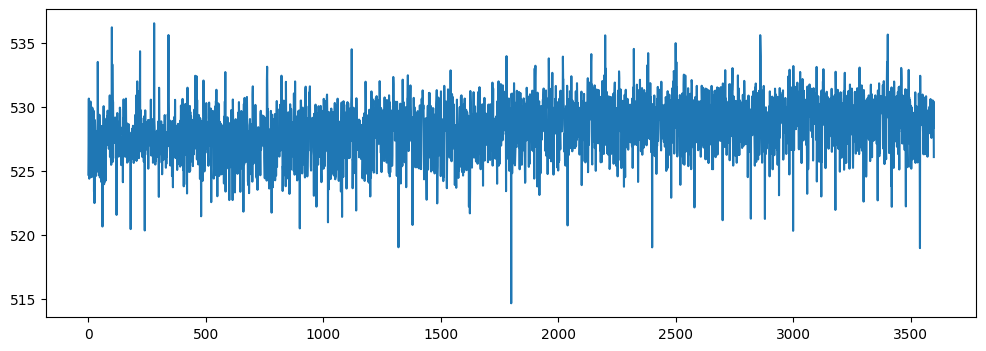

In [24]:
# SSNC7
plt.figure(figsize=(12,4))
plt.plot(Ex_PEAK_df['External Sound'])
plt.show()

In [25]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'SSNC'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
    
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True) 
        
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'SSNC'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'SSNC'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3556 entries, 0 to 3555
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3556 non-null   datetime64[ns]
 1   Internal Sound  3556 non-null   float64       
 2   type            3556 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 83.5+ KB


In [26]:
In_STD_df

,Time,Internal Sound,type
0,2023-06-01 16:03:59,202.096881,SSNC
1,2023-06-01 16:04:00,194.969508,SSNC
2,2023-06-01 16:04:01,203.679584,SSNC
3,2023-06-01 16:04:03,199.349876,SSNC
4,2023-06-01 16:04:04,203.246460,SSNC
...,...,...,...
3551,2023-06-01 17:04:31,200.198983,SSNC
3552,2023-06-01 17:04:32,206.162369,SSNC
3553,2023-06-01 17:04:33,186.856666,SSNC
3554,2023-06-01 17:04:34,199.574559,SSNC


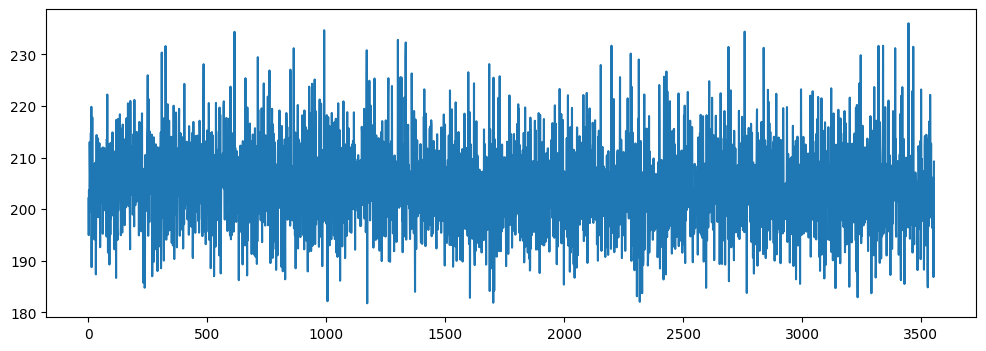

In [29]:
# SSNC Internal Sound
plt.figure(figsize=(12,4))
plt.plot(In_STD_df['Internal Sound'])
plt.show()

In [13]:
os.chdir(r'C:\Users\pjk98\Data\Tension\SSNC7')
file_list = glob.glob("./*.csv", recursive=True)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'SSJD'
Tension_df

,Time,Tension,type
0,[2023/06/01] 16:04:36,152.0,SSJD
1,[2023/06/01] 16:04:37,173.0,SSJD
2,[2023/06/01] 16:04:38,167.0,SSJD
3,[2023/06/01] 16:04:39,141.0,SSJD
4,[2023/06/01] 16:04:40,148.0,SSJD
...,...,...,...
3595,[2023/06/01] 17:04:31,181.0,SSJD
3596,[2023/06/01] 17:04:32,188.0,SSJD
3597,[2023/06/01] 17:04:33,160.0,SSJD
3598,[2023/06/01] 17:04:34,157.0,SSJD


In [14]:
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_34852\2738122520.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_34852\2738122520.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


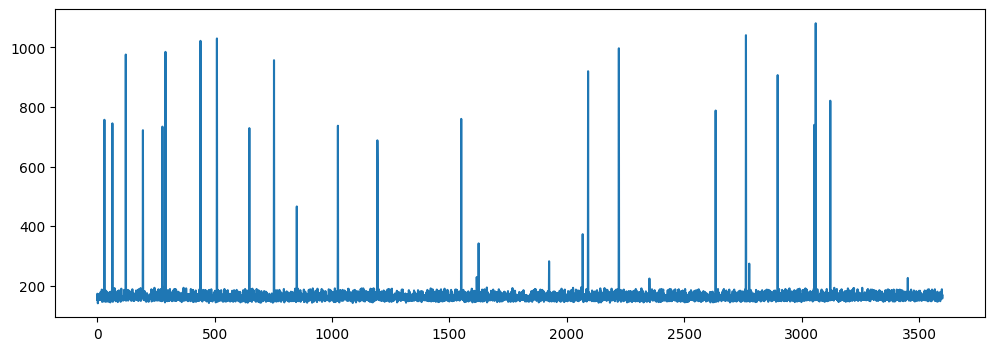

In [15]:
# SSNC Tension
plt.figure(figsize=(12,4))
plt.plot(Tension_df.Tension)
plt.show()

In [36]:
# 3개의 데이터프레임 병합
SSNC = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
SSNC = pd.merge(SSNC, In_STD_df, on='Time')
# new_order = ['Time', 'Tension', 'External Sound', 'type']
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
SSNC = SSNC.reindex(columns=new_order)
SSNC['type'] = 'SSNC'

print(SSNC)

                    Time  Tension  Internal Sound  External Sound  type
0    2023-06-01 16:04:36    152.0      206.510397      528.068626  SSNC
1    2023-06-01 16:04:37    173.0      208.699610      526.793372  SSNC
2    2023-06-01 16:04:38    167.0      198.482465      524.943861  SSNC
3    2023-06-01 16:04:39    141.0      210.154695      527.100366  SSNC
4    2023-06-01 16:04:40    148.0      201.973894      533.508886  SSNC
...                  ...      ...             ...             ...   ...
3480 2023-06-01 17:03:55    155.0      195.787997      529.765401  SSNC
3481 2023-06-01 17:03:56    169.0      212.194068      528.273556  SSNC
3482 2023-06-01 17:03:57    169.0      214.174676      528.628405  SSNC
3483 2023-06-01 17:03:58    158.0      203.015907      530.412455  SSNC
3484 2023-06-01 17:03:59    183.0      192.974370      526.072883  SSNC

[3485 rows x 5 columns]


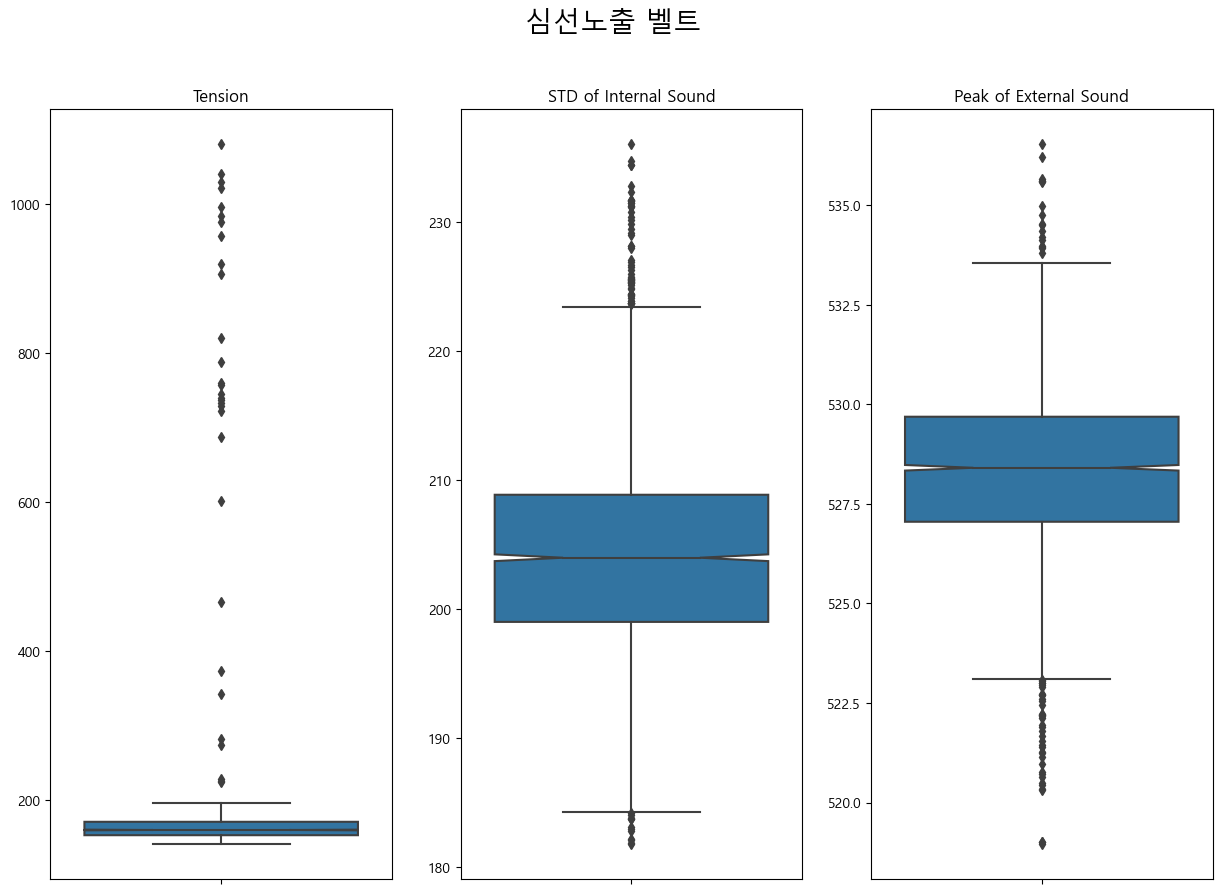

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

sns.boxplot(data=SSNC['Tension'], ax=axes[0], notch=True)
sns.boxplot(data=SSNC['Internal Sound'], ax=axes[1], notch=True)
sns.boxplot(data=SSNC['External Sound'], ax=axes[2], notch=True)

axes[0].set_title("Tension")
axes[1].set_title("STD of Internal Sound")
axes[2].set_title("Peak of External Sound")

axes[0].set_xticklabels([''])
axes[1].set_xticklabels([''])
axes[2].set_xticklabels([''])

plt.suptitle('심선노출 벨트', fontsize=20)

plt.show()

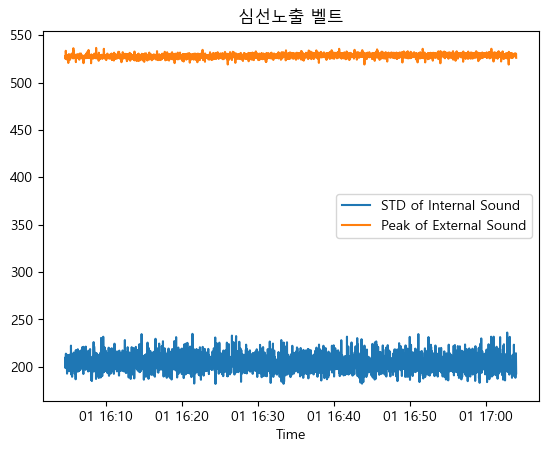

In [41]:
x = SSNC['Time']
y1 = SSNC['Internal Sound']
y2 = SSNC['External Sound']
plt.plot(x, y1, label='STD of Internal Sound')
plt.plot(x, y2, label='Peak of External Sound')

# 그래프 제목, 축 라벨 설정
plt.title('심선노출 벨트')
plt.xlabel('Time')
plt.ylabel('')


plt.legend()
plt.show()